# Essentials of Machine Learning Algorithms

This notebook is used to showed basic machine learning algorithms.

In [19]:
# Auto-generated table of content
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

## Machine Learning Algorithm Types
### 1. Supervised Learning

This algorithm consist of a **target/outcome** variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, **we generate a function that map inputs to desired outputs**. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.

### 2. Unsupervised Learning
In this algorithm, we **do not have any target/outcome** variable to predict/estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning: Apriori algorithm, K-means.

### 3. Reinforcement Learning
Using this algorithm, the machine is trained to make specific decisions. It works this way: the **machine is exposed to an environment where it trains itself continually using trial and error**. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning: Markov Decision Process

## Common Machine Learning Algorithms
Here is the list of commonly used machine learning algorithms. These algorithms can be applied to almost any data problem:

1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. SVM
5. Naive Bayes
6. kNN
7. K-Means
8. Random Forest
9. Dimensionality Reduction Algorithms
10. Gradient Boosting algorithms<br>
    a. GBM<br>
    b. XGBoost<br>
    c. LightGBM<br>
    d. CatBoost<br>

Below are algorithm descriptions with code


In [20]:
import numpy as np   # math library
import pandas as pd  # dataframe library 

In [21]:
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## 1. Linear Regression
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we **establish relationship** between **independent** and **dependent variables** by **fitting a best line**. This best fit line is known as regression line and represented by a linear equation

$$Y= a\cdot X + b\tag{1.1}$$

*The best way to understand linear regression is to relive this experience of childhood. Let us say, you ask a child in fifth grade to arrange people in his class by increasing order of weight, without asking them their weights! What do you think the child will do? He/she would likely look (visually analyze) at the height and build of people and arrange them using a combination of these visible parameters. This is linear regression in real life! The child has actually figured out that height and build would be correlated to the weight by a relationship, which looks like the equation above.*

In equation (1.1):

- $Y$ – Dependent Variable
- $a$ – Slope/Coefficient
- $X$ – Independent variable
- $b$ – Intercept/Bias

These coefficients $a$ and $b$ are derived based on **minimizing the sum of squared difference of distance** between data points $Y$ and regression line $\hat{Y}$:

$$\sum(\hat{Y}-Y)^2\tag{1.2}$$

Look at the below example. Here we have identified the best fit line having linear equation $y=0.2811x+13.9$. Now using this equation, we can find the weight, knowing the height of a person.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Linear_Regression.png)

Linear Regression is of mainly two types: **Simple** Linear Regression and **Multiple** Linear Regression. Simple Linear Regression is characterized by **one independent** variable. And, Multiple Linear Regression(as the name suggests) is characterized by **multiple** (more than 1) **independent** variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

### 1.1 Simple Linear Regression

In [22]:
# Import Library
# Import other necessary libraries like pandas, numpy...
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
# Load Train and Test datasets
# We do it by generation

# independent variable
X = np.arange(-5, 10, 0.05)

# true value
Y = 2*X + 3

# noise
np.random.seed(42)
Z = np.random.normal(size=len(X))

# add noise to true value
Y_true = Y + Z

# reshape for model
X = X.reshape(-1, 1)
Y_true = Y_true.reshape(-1, 1)

# split to train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_true,test_size=0.2)

In [24]:
# Create linear regression object
linear = linear_model.LinearRegression()

# Train the model using the training sets and check R^2 score
linear.fit(X_train, Y_train)
linear.score(X_train, Y_train) # 0.9874635382351064

0.9874635382351064

In [25]:
# Equation coefficient and Intercept
print('Coefficient:', linear.coef_, '~2')
print('Intercept/Bias:', linear.intercept_, '~3')
print('Linear model:', 'Y = '+str(linear.coef_[0][0])+'X + '+str(linear.intercept_[0]))

Coefficient: [[2.01253793]] ~2
Intercept/Bias: [2.99408485] ~3
Linear model: Y = 2.0125379309176683X + 2.994084847169349


In [26]:
# calculate mean squared error on train/test dataset
# train set
Y_train_hat = linear.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train, y_pred=Y_train_hat)
print('Mean squared error on train set:', mse_train)  # 0.9655915183765666

Y_test_hat = linear.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test, y_pred=Y_test_hat)
print('Mean squared error on test set:', mse_test)  # 0.9518984871189602

Mean squared error on train set: 0.9655915183765664
Mean squared error on test set: 0.9518984871189607


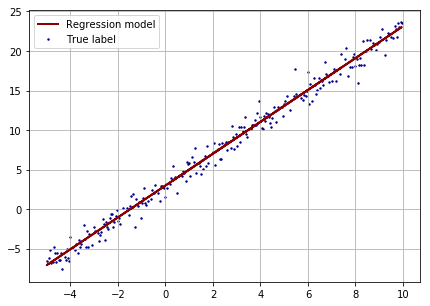

In [27]:
# visualization results
plt.figure(figsize=(7,5))
plt.scatter(x=X_train, y=Y_train, s=2, c='darkblue',label='True label')
plt.plot(X_train, Y_train_hat, c='darkred', linewidth=2, label='Regression model')
plt.legend()
plt.grid(True)

### 1.2 Multiple Linear Regression
with Boston Housing Dataset

In [28]:
# load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [29]:
# see type of dataset
type(boston_dataset)

sklearn.utils.Bunch

In [30]:
# print the keys
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
# see each part
# Description
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# filename
print(boston_dataset.filename)

In [34]:
# feature names
print(boston_dataset.feature_names)  # see the description for more information

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [35]:
# data and target
type(boston_dataset.data)

numpy.ndarray

In [36]:
boston_dataset.data.shape
# 506 rows and 13 columns

(506, 13)

In [37]:
boston_dataset.target.shape
# 506 rows

(506,)

In [54]:
# view as dataframe
boston_df=pd.DataFrame(
    data=np.append(boston_dataset.data, boston_dataset.target.reshape(-1, 1), axis=1), 
    columns=np.append(boston_dataset.feature_names, ['PRICE'])
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


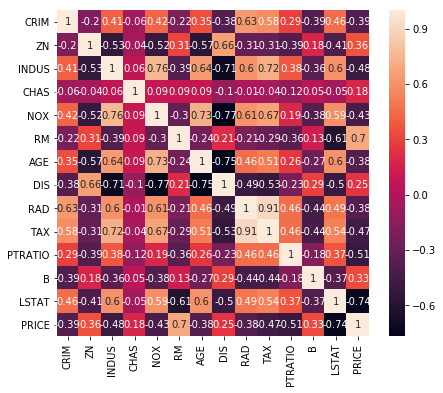

In [58]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(7,6))
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'PRICE')

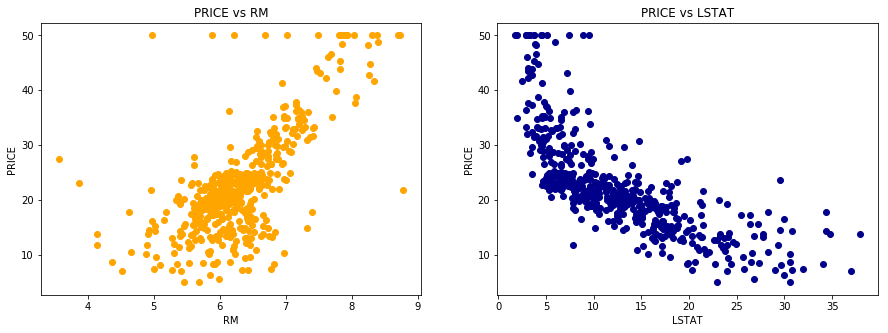

In [65]:
# sample plot data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(boston_df.RM, boston_df.PRICE, c='orange')
plt.title('PRICE vs RM')
plt.xlabel('RM')
plt.ylabel('PRICE')

plt.subplot(1,2,2)
plt.scatter(boston_df.LSTAT, boston_df.PRICE, c='darkblue')
plt.title('PRICE vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

In [67]:
# create train/test datasets
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    boston_dataset.data, boston_dataset.target.reshape(-1,1),
    test_size=0.2,
    random_state=5
)

In [66]:
# model object
lrModel = linear_model.LinearRegression()

In [68]:
# train model
lrModel.fit(X=Xtrain, y=Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
print('Model coefficients:', lrModel.coef_[0])
print('Model bias:', lrModel.intercept_[0])

Model coefficients: [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Model bias: 37.91248700975085


In [80]:
print('MSE on train set:', mean_squared_error(Ytrain,lrModel.predict(Xtrain)))
print('MSE on test set:', mean_squared_error(Ytest,lrModel.predict(Xtest)))
print('RMSE on train set:', np.sqrt(mean_squared_error(Ytrain,lrModel.predict(Xtrain))/Ytrain.shape[0]))
print('RMSE on test set:', np.sqrt(mean_squared_error(Ytest,lrModel.predict(Xtest))/Ytest.shape[0]))

MSE on train set: 22.477090408387635
MSE on test set: 20.869292183770476
RMSE on train set: 0.2358736153048897
RMSE on test set: 0.45232831412863783


## 2. Logistic Regression
Don’t get confused by its name! It is **a classification not a regression** algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it **predicts the probability of occurrence of an event** by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

Again, let us try and understand this through a simple example.

*Let’s say your friend gives you a puzzle to solve. There are only 2 outcome scenarios – either you solve it or you don’t. Now imagine, that you are being given wide range of puzzles/quizzes in an attempt to understand which subjects you are good at. The outcome to this study would be something like this – if you are given a trignometry based tenth grade problem, you are 70% likely to solve it. On the other hand, if it is grade fifth history question, the probability of getting an answer is only 30%. This is what Logistic Regression provides you.*

Coming to the math, the log odds of the outcome is modeled as a linear combination of the predictor variables.

$$
\text{odds} = \frac{p}{1-p} = \frac{\text{probability of event occurrence}}{\text{probability of not event occurrence}}\\
\ln(\text{odds})=\ln\left(\frac{p}{1-p}\right)\\
\text{logit}(p)=\ln\left(\frac{p}{1-p}\right)=b_0+b_1x_1+b_2x_2+b_3x_3+....+b_kx_k
$$

Above, $p$ is the **probability of presence** of the characteristic of interest. It chooses parameters that **maximize the likelihood** of observing the sample values rather than that minimize the sum of squared errors (like in ordinary regression).

Now, you may ask, why take a log? For the sake of simplicity, let’s just say that this is one of the best mathematical way to replicate a step function. I can go in more details, but that will beat the purpose of this article.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Logistic_Regression.png)

In [82]:
# Sample code with breast cancer data set
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [83]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [84]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [88]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [89]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [93]:
# dataframe view
breast_cancer_df = pd.DataFrame(
    data=np.append(breast_cancer.data, breast_cancer.target.reshape(-1, 1), axis=1), 
    columns=np.append(breast_cancer.feature_names,['class'])
)
breast_cancer_df['class'] = breast_cancer_df['class'].map({0: 'malignant', 1: 'benign'})
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,malignant
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,malignant
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,malignant
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,malignant
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,malignant
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,malignant
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,malignant
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,malignant
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,malignant
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,malignant


In [95]:
# split train/test
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    breast_cancer.data, breast_cancer.target.reshape(-1,1),
    test_size = 0.3, 
    random_state=42
)

In [96]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(398, 30) (171, 30) (398, 1) (171, 1)


In [98]:
lrClass = linear_model.LogisticRegression()
lrClass.fit(X=Xtrain, y=Ytrain)

/home/hung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hung/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
Ytrain_pred = lrClass.predict(Xtrain)
Ytest_pred = lrClass.predict(Xtest)

In [108]:
print("Accuracy on train set:", round(lrClass.score(X=Xtrain, y=Ytrain)*100,1), '%')
print("Accuracy on test set:", round(lrClass.score(X=Xtest, y=Ytest)*100,1), '%')

Accuracy on train set: 95.2 %
Accuracy on test set: 96.5 %


In [33]:
# https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155